In [14]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt



In [13]:
art = pd.read_csv("Art.csv")
artHood = art.groupby("neighborhood").count().reset_index()
artHood
n = 0
neighbor = ''
count = 0
while(n<len(artHood)):
    if(artHood.iloc[n][1] > count):
        neighbor = artHood.iloc[n][0]
        count = artHood.iloc[n][1]
    n = n+1

print(neighbor)

Central Business District


In [25]:
ff = pd.read_csv("fastfoodset.csv")

query= ff['Category'] == "Take Out"
takeout= ff[query]
frequency = takeout["ZIP Code"].value_counts().max
print(frequency)
freqchart2=takeout["ZIP Code"].value_counts().sort_values(ascending=False).reset_index()
freqchart2.head(25)
maggiesbest=freqchart2.iloc[0][0]
print(maggiesbest)

<bound method Series.max of 15146    15
15222    10
15205     9
15213     9
15237     8
         ..
15148     1
15201     1
15044     1
15211     1
15238     1
Name: ZIP Code, Length: 68, dtype: int64>
15146


In [9]:
plumbers = pd.read_csv("Plumbers.csv")
frequency = plumbers["zip"].value_counts().max
print(frequency)

frequency2 = plumbers["zip"].value_counts().sort_values(ascending = False).reset_index()
frequency2.head(25)
best = frequency2.iloc[0][0]
print(best)

<bound method Series.max of 15642    45
15237    44
15236    40
15120    35
15227    35
         ..
15670     1
80920     1
18237     1
15022     1
34240     1
Name: zip, Length: 209, dtype: int64>
15642


,index,zip
0,15642,45
1,15237,44
2,15236,40
3,15120,35
4,15227,35
...,...,...
204,15347,1
205,46112,1
206,15342,1
207,15035,1


In [106]:

bestzip=0
largestnum=0
combineddata=pd.DataFrame(columns=['zipcode','average'])
for row in freqchart2.itertuples(index = True, name ='P'): 
    mnum=getattr(row, 'index')
    #print(isinstance(mnum,int))
    #print(isinstance(row,int))
    for row2 in frequency2.itertuples(index = True, name ='Pandas'):
        #frequency2[frequency2.index!="na"]
        
        try:
            jnum=(getattr(row2, "index"))
            jnum=int(jnum)
        except ValueError:
            x=True
        #print(isinstance(jnum,int))
        #print(mnum)
        #print(jnum)
        if(mnum==jnum):
            #print(mnum)
            try:
                row2int=row2[2]
                row2int=int(row2int)
            except ValueError:
                x=True
            avg=(row[2]+row2int)/2
            newrow={'zipcode':mnum,'average':avg}
            #print(newrow)
            combineddata=combineddata.append(newrow, ignore_index=True)
            break
combineddata=combineddata.sort_values(by=['average'],ascending=False)
print(combineddata)
#print(bestzip)
#print(largestnum)
                

    zipcode  average
3   15237.0     26.0
4   15236.0     24.0
5   15227.0     21.0
15  15120.0     20.0
10  15102.0     19.5
..      ...      ...
48  15144.0      2.0
53  15208.0      2.0
43  15139.0      2.0
59  15003.0      2.0
50  15148.0      1.0

[61 rows x 2 columns]


,index,ZIP Code
0,15146,15
1,15222,10
2,15205,9
3,15213,9
4,15237,8


In [42]:
frequency2.head()

,index,zip
0,15642,45
1,15237,44
2,15236,40
3,15120,35
4,15227,35


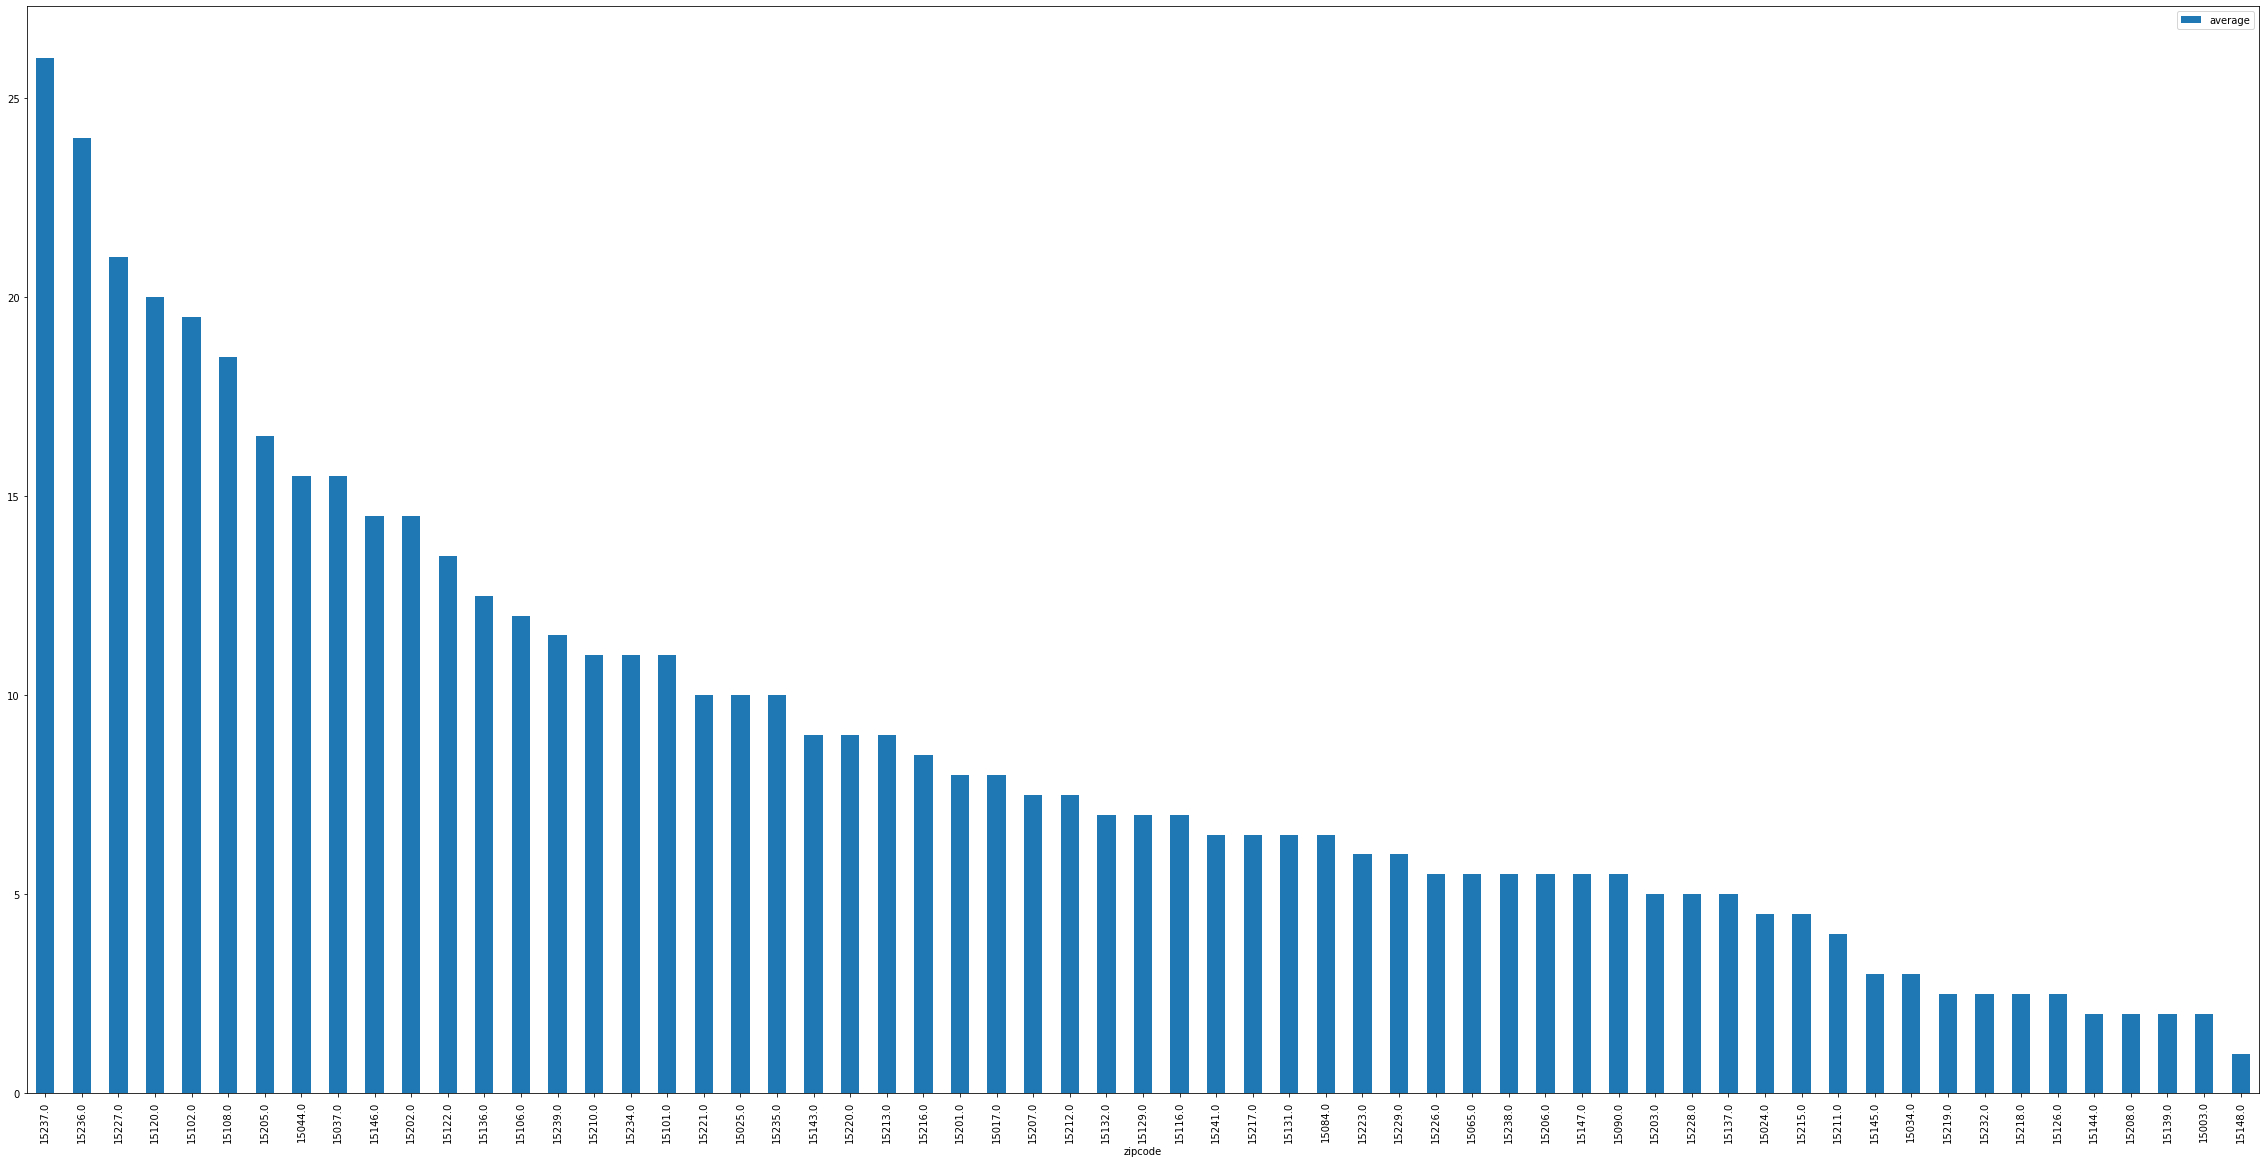

In [113]:
combineddata.plot.bar(x='zipcode',y='average', figsize=(40,20))